In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.preprocessing import scale
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [2]:
def load_features(file_names, drop_attr=[]):
    df_list = []
    for file in file_names:
        df = pd.read_csv(file, index_col=[0], header=[0], delimiter="\t", skiprows=[1])
        df = df.dropna(axis=1, how='any').transpose()
        df = df.iloc[:,6:]
        df = df.drop(drop_attr, axis=1)
        df_list.append(df)
    return(df_list)

def feature_hist(df, ncol=4, len_single_plot = 5):
    n = df.shape[1]
    if((n % ncol)==0):
        nrow = int(n / ncol)
    else:
        nrow = int(n / ncol + 1)
        
    print(nrow, ncol)
    fig, ax = plt.subplots(nrow, ncol, figsize=(len_single_plot*ncol, len_single_plot*nrow))
    ax = ax.reshape(-1,)
    for i in range(n):
        ax[i].hist(df.iloc[:,i], label = df.columns[i])
        ax[i].legend()
    return


def feature_hist_compare(df_list, df_names, ncol=4, len_single_plot = 5):
    n = df_list[0].shape[1]
    featuer_names = df_list[0].columns.tolist()
    assert all([df.shape[1]==n for df in df_list])
    assert len(df_list) == len(df_names)
    if((n % ncol)==0):
        nrow = int(n / ncol)
    else:
        nrow = int(n / ncol + 1)
        
    print(nrow, ncol)
    fig, ax = plt.subplots(nrow, ncol, figsize=(len_single_plot*ncol, len_single_plot*nrow))
    ax = ax.reshape(-1,)
    for i in range(n):
        ax[i].set_title(featuer_names[i])
        for j in range(len(df_list)):
            df = df_list[j]
            ax[i].hist(df.iloc[:,i], histtype='step', density=True, label=df_names[j])
        ax[i].legend()
    return

# Features:	 20
# CPU:	 56
# LGN:	 11
5 4


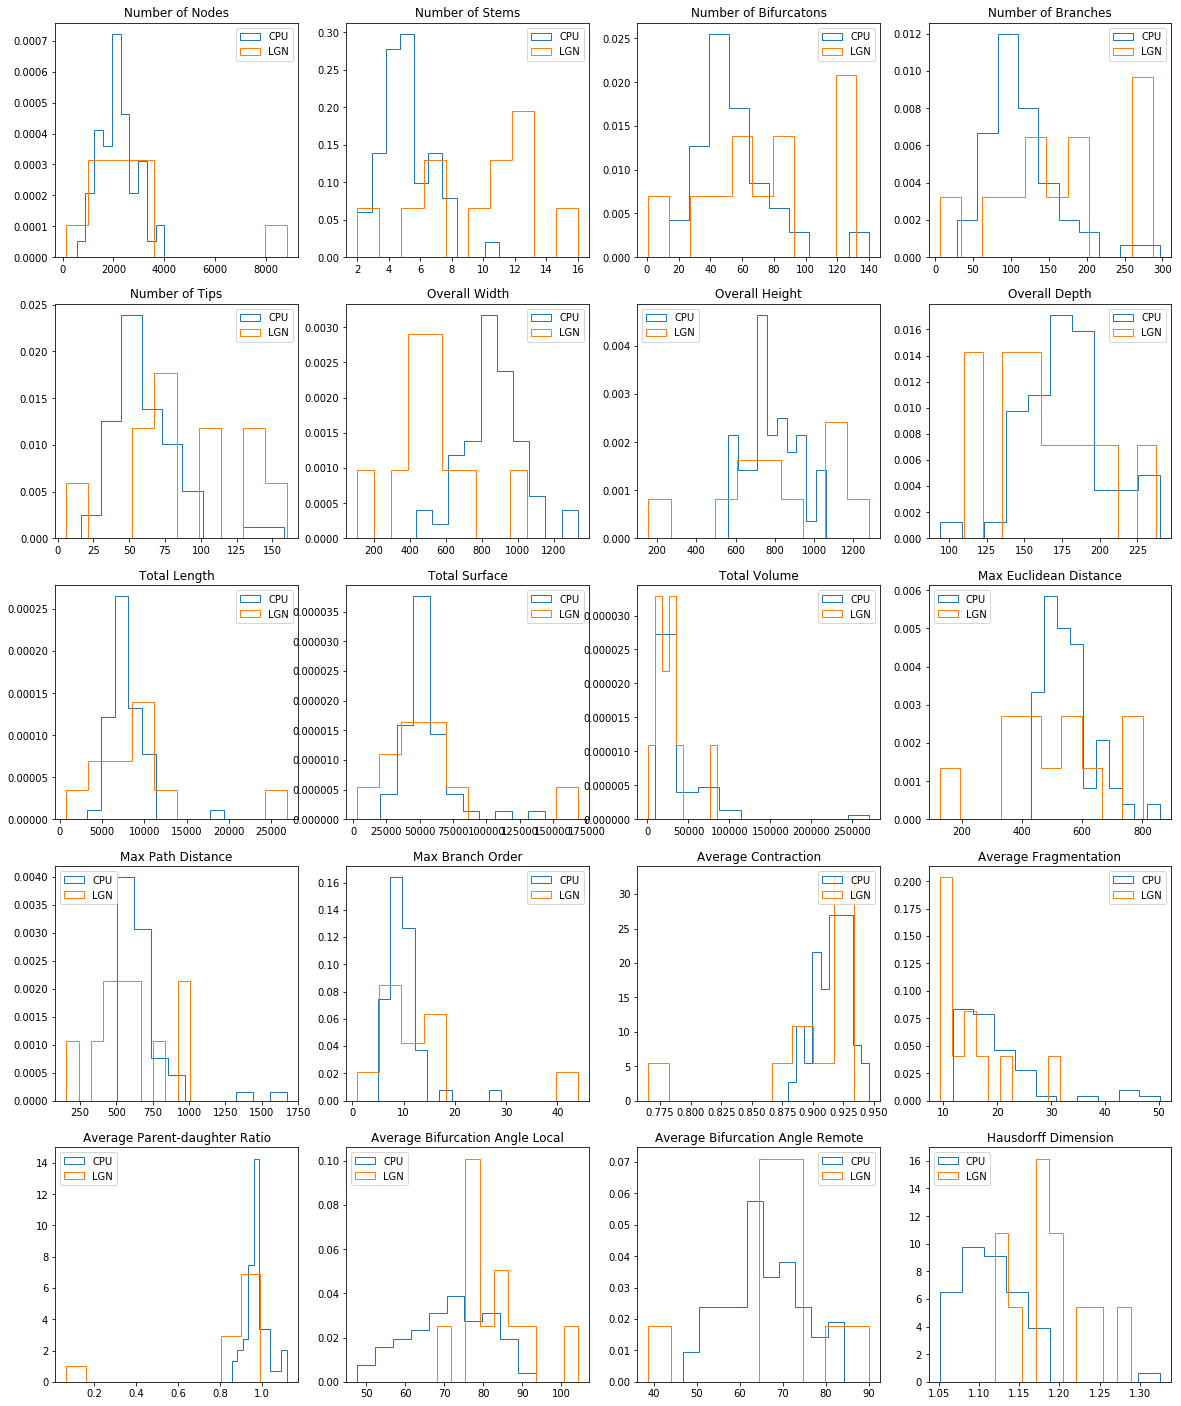

In [3]:
cpu, lgn = load_features(
    file_names = ['data/17302_CPU.dendrite.features', 'data/17302_LGN.dendrite.features'],
    drop_attr = ['Soma Surface', 'Average Diameter'])
print('# Features:\t', cpu.shape[1])
print("# CPU:\t", len(cpu))
print("# LGN:\t", len(lgn))
feature_hist_compare([cpu, lgn], ['CPU', 'LGN'])

# Features:	 20
# CPU:	 50
# LGN:	 11
5 4


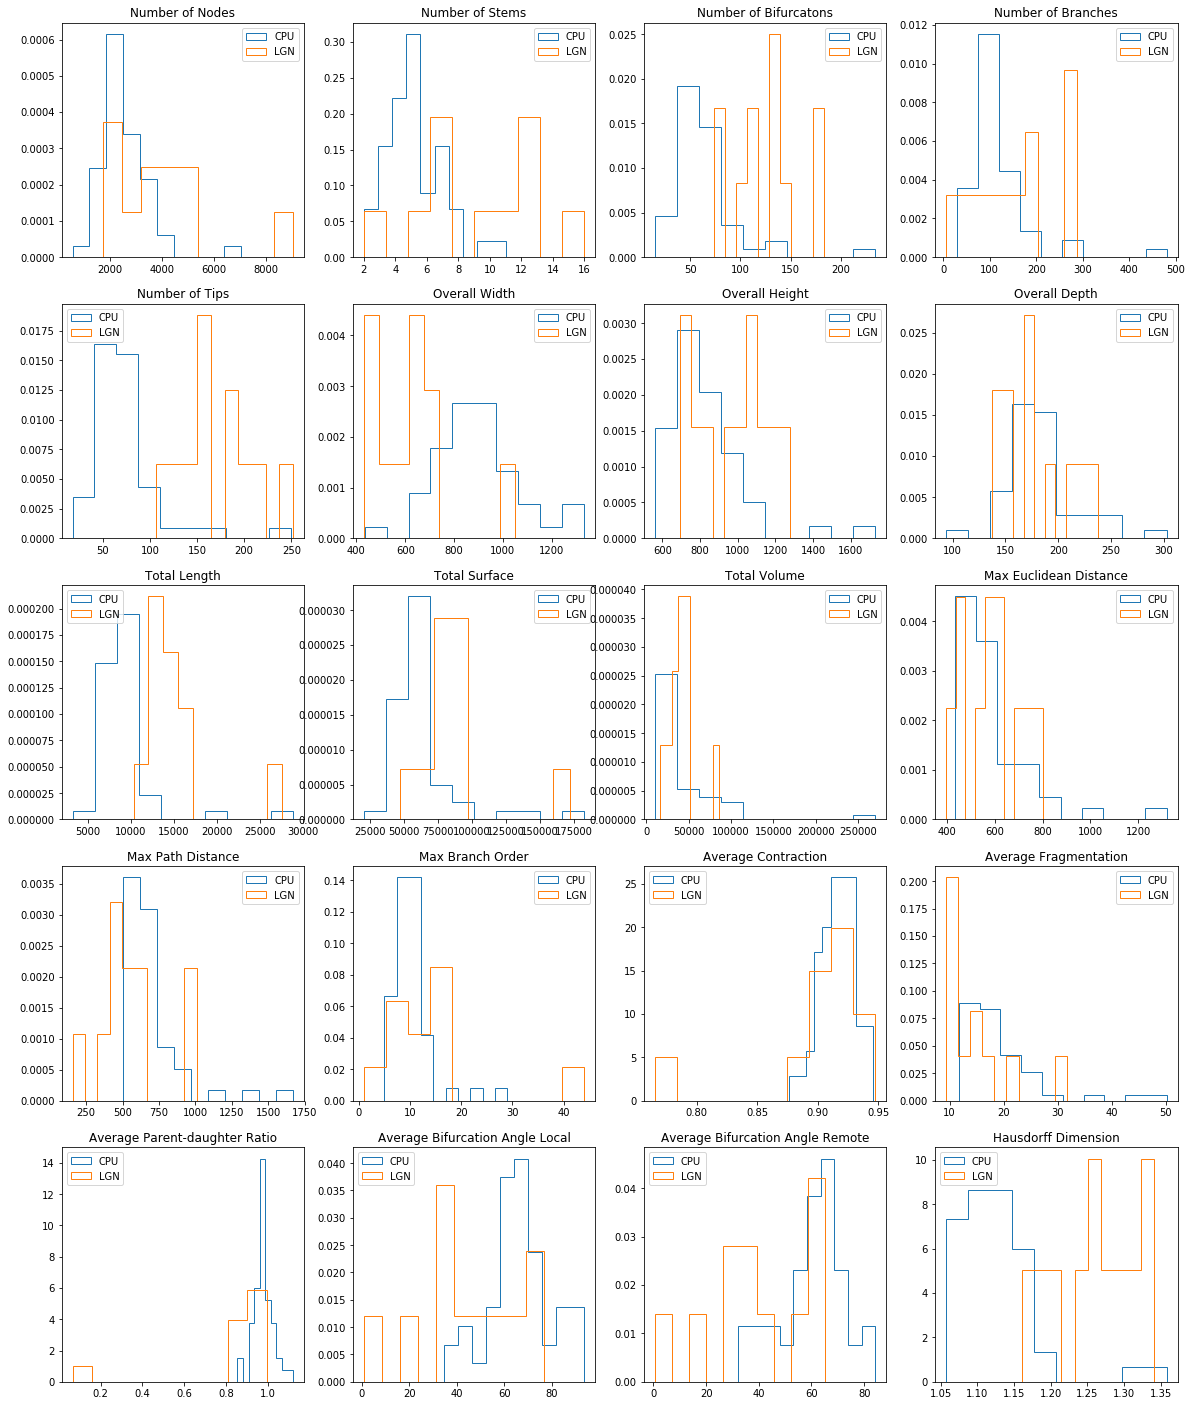

In [21]:
cpu, lgn = load_features(
    file_names = ['data/17302_CPU.dendrite.features', 'data/17302_LGN.dendrite.features'],
    drop_attr = ['Soma Surface', 'Average Diameter'])
print('# Features:\t', cpu.shape[1])
print("# CPU:\t", len(cpu))
print("# LGN:\t", len(lgn))
feature_hist_compare([cpu, lgn], ['CPU', 'LGN'])

In [23]:
cpu.sort_values("Total Volume", ascending=False)

ID,Number of Nodes,Number of Stems,Number of Bifurcatons,Number of Branches,Number of Tips,Overall Width,Overall Height,Overall Depth,Total Length,Total Surface,Total Volume,Max Euclidean Distance,Max Path Distance,Max Branch Order,Average Contraction,Average Fragmentation,Average Parent-daughter Ratio,Average Bifurcation Angle Local,Average Bifurcation Angle Remote,Hausdorff Dimension
031,3163.0,3.0,34.0,69.0,36.0,1130.900,909.000,197.4400,10506.00,143908.0,270451.0,608.046,1420.890,11.0,0.907200,44.8261,0.971935,64.5348,70.1041,1.13883
015,3274.0,10.0,28.0,64.0,37.0,823.000,736.000,180.9900,7796.81,81949.0,107489.0,493.491,528.138,6.0,0.876031,50.1406,0.954948,65.0096,63.8336,1.06417
086,3412.0,2.0,64.0,82.0,70.0,899.330,808.672,177.2800,8921.11,87665.2,106217.0,527.683,581.839,11.0,0.918928,25.5488,1.119110,41.1391,34.3151,1.07005
023,7054.0,5.0,234.0,480.0,250.0,710.000,1384.000,164.0200,28833.50,182910.0,93664.9,751.711,1177.800,23.0,0.945597,13.6708,1.000000,93.6331,84.2746,1.35785
009,3354.0,3.0,60.0,122.0,65.0,933.000,761.000,175.0000,8020.76,80502.9,88906.6,510.000,561.516,9.0,0.926812,26.4672,1.036930,60.0882,65.5725,1.07558
003,1942.0,6.0,49.0,88.0,60.0,905.529,630.000,190.3200,9094.22,63337.0,77077.8,496.907,560.587,5.0,0.902264,17.8068,1.034660,63.6490,58.9630,1.17562
016,2078.0,6.0,47.0,98.0,54.0,977.000,899.980,223.4700,7435.25,65565.1,70309.2,651.761,790.110,8.0,0.924752,20.1224,1.050410,59.8547,62.5932,1.15876
007,2085.0,5.0,56.0,117.0,65.0,838.000,738.000,203.3700,7884.43,65954.7,67934.1,470.307,524.776,9.0,0.915866,16.3162,0.994790,88.5537,83.6332,1.05717
012,4017.0,4.0,132.0,268.0,138.0,1071.000,786.000,192.0000,10941.40,83068.3,66639.7,681.288,782.987,14.0,0.936154,13.9627,1.071810,56.4445,53.5552,1.14202
020,3954.0,7.0,140.0,297.0,160.0,721.330,1060.000,216.9300,19418.80,118231.0,65954.4,612.274,667.026,14.0,0.929843,12.2963,1.022230,84.9119,70.9906,1.32539


In [15]:
lgn.sort_values("Max Branch Order", ascending=False)

ID,Number of Nodes,Number of Stems,Number of Bifurcatons,Number of Branches,Number of Tips,Overall Width,Overall Height,Overall Depth,Total Length,Total Surface,Total Volume,Max Euclidean Distance,Max Path Distance,Max Branch Order,Average Contraction,Average Fragmentation,Average Parent-daughter Ratio,Average Bifurcation Angle Local,Average Bifurcation Angle Remote,Hausdorff Dimension
064,4611.0,9.0,184.0,276.0,253.0,436.000,1103.00,155.02,15214.5,90073.2,47531.3,558.989,980.744,44.0,0.916681,9.35145,0.975897,60.533900,57.729600,1.33983
117,9063.0,2.0,134.0,270.0,142.0,1050.000,1280.00,237.49,27500.6,172697.0,86319.5,800.865,1007.630,18.0,0.918478,31.70370,0.991333,76.760400,65.315800,1.25523
121,2337.0,9.0,80.0,90.0,103.0,470.170,1116.00,176.54,12128.3,76204.4,38102.2,757.660,430.105,17.0,0.918808,10.47780,0.902000,38.659700,28.704800,1.20406
065,4789.0,6.0,180.0,189.0,219.0,430.051,1069.00,137.00,15690.5,92304.1,44204.6,613.311,661.703,16.0,0.930794,11.29100,0.970989,41.415400,36.310400,1.33195
119,3753.0,5.0,134.0,209.0,160.0,704.070,942.00,156.00,15035.4,91730.9,45016.3,582.421,591.017,15.0,0.920040,11.43540,0.990478,57.844800,51.706500,1.24097
118,4786.0,4.0,146.0,83.0,183.0,707.000,708.00,177.00,13578.7,79544.1,37982.3,439.500,477.594,10.0,0.895012,18.97590,0.930913,19.637500,16.591400,1.17905
039,2379.0,8.0,98.0,67.0,136.0,645.400,696.00,189.50,12841.4,73413.7,36529.8,395.260,409.832,8.0,0.898395,11.41790,0.938359,23.239000,22.107000,1.27832
066,4057.0,6.0,134.0,61.0,188.0,646.000,843.00,175.59,14950.0,88569.5,42621.8,465.567,508.214,7.0,0.912321,13.70490,0.900821,21.805000,18.643000,1.19843
120,2535.0,6.0,100.0,99.0,129.0,448.000,1038.00,142.00,10586.8,67392.1,39420.0,598.426,526.713,7.0,0.939959,10.90910,0.945253,35.858000,31.472500,1.26351
040,3608.0,9.0,112.0,92.0,156.0,598.000,792.00,214.00,16807.9,73229.2,26180.2,554.976,397.239,6.0,0.876539,17.27170,0.886402,31.171100,26.144100,1.29848


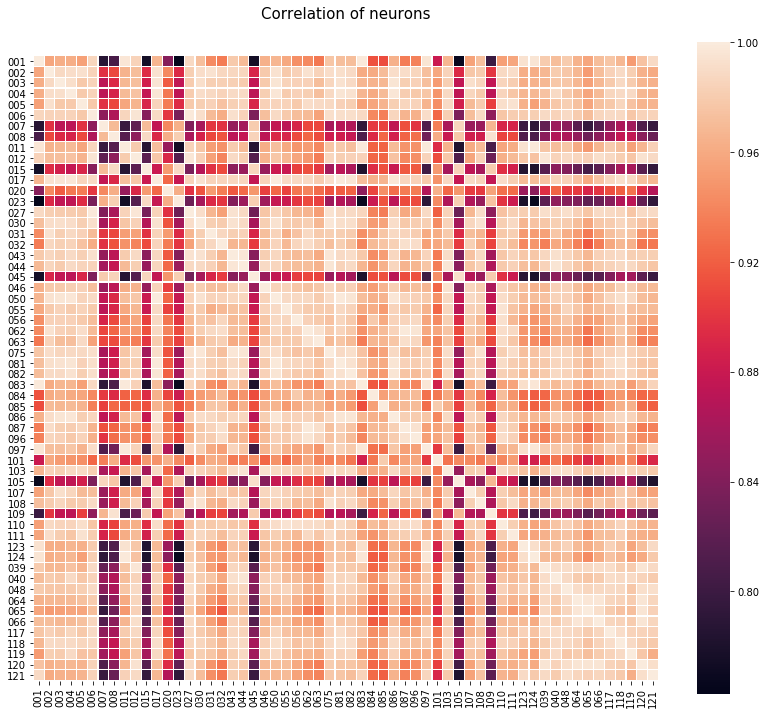

In [46]:
combined = pd.concat([cpu, lgn], axis=0)
# combined = combined[['Number of Branches', 'Number of Bifurcatons']]
plt.figure(figsize=(14,12))
plt.title('Correlation of neurons',y=1.05,size=15)
sns.heatmap(combined.transpose().corr(method='spearman'), linewidths=0.1, vmax=1.0,
            square=True, linecolor='white', annot=False)

# Features:	 20
# CPU:	 46
# LGN:	 11
5 4


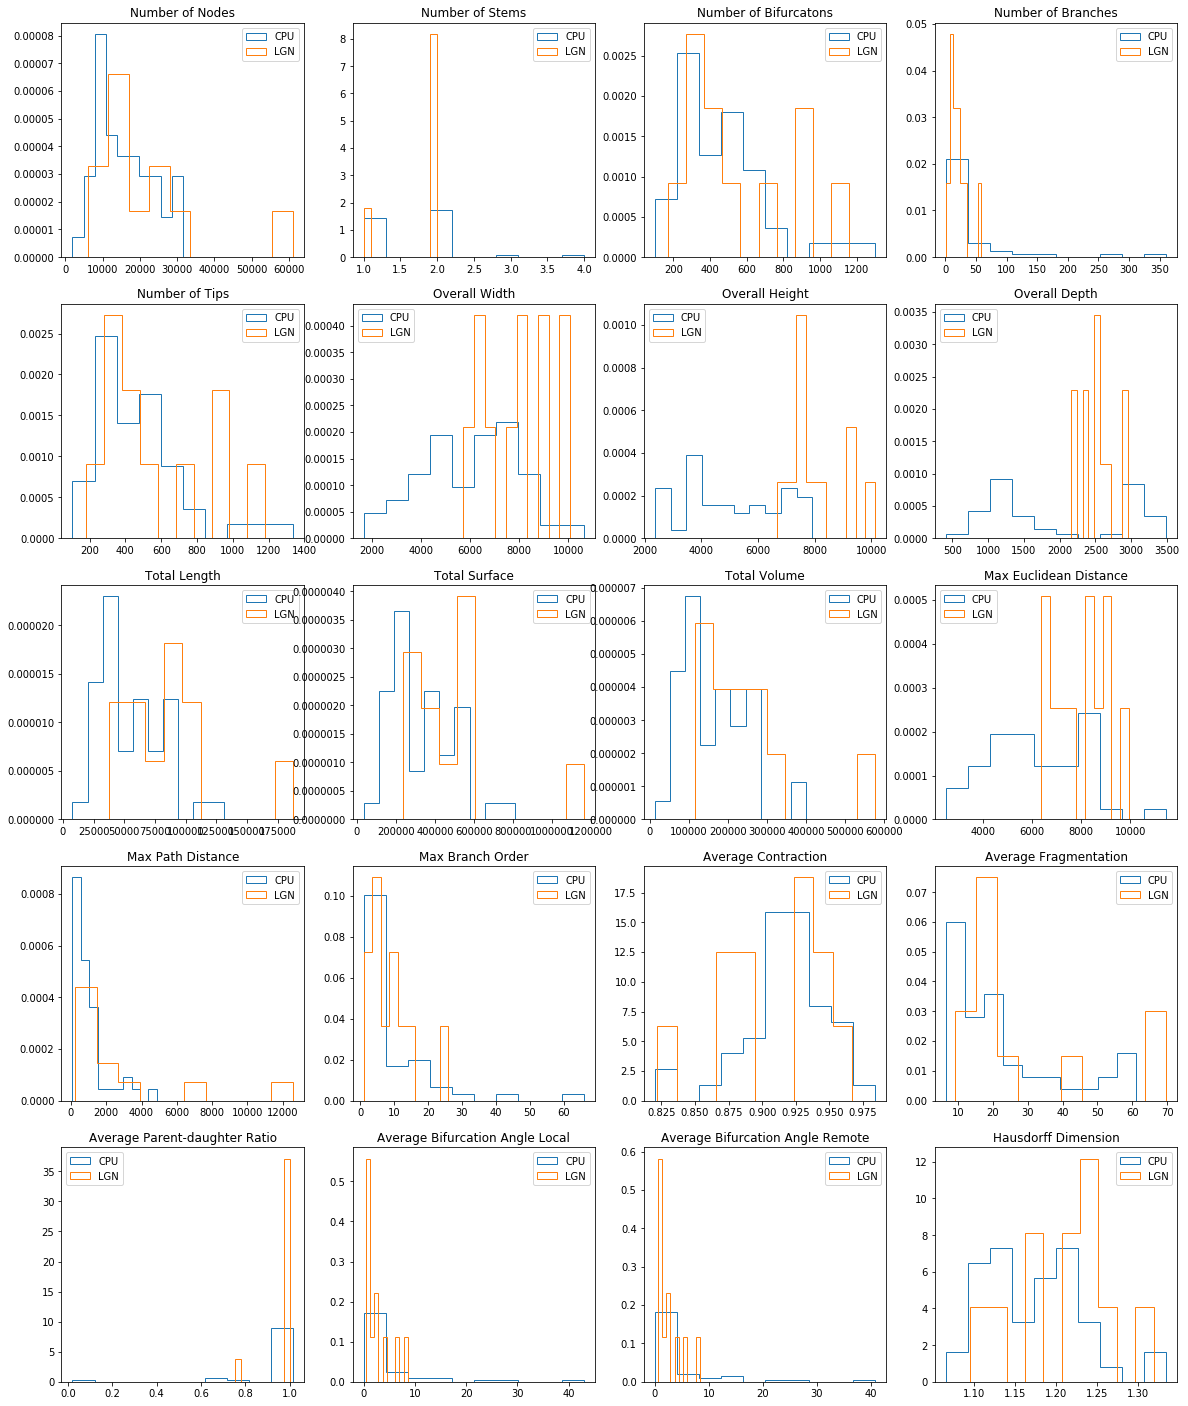

In [29]:
cpu, lgn = load_features(
    file_names = ['data/17302_CPU.axon.features', 'data/17302_LGN.axon.features'],
    drop_attr = ['Soma Surface', 'Average Diameter'])
print('# Features:\t', cpu.shape[1])
print("# CPU:\t", len(cpu))
print("# LGN:\t", len(lgn))
feature_hist_compare([cpu, lgn], ['CPU', 'LGN'])

In [27]:
cpu.sort_values('Number of Tips', ascending=False)
# cpu.sort_values('Overall Width', ascending=False)
# cpu.sort_values('Average Fragmentation', ascending=False)

ID,Number of Nodes,Number of Stems,Number of Bifurcatons,Number of Branches,Number of Tips,Overall Width,Overall Height,Overall Depth,Total Length,Total Surface,Total Volume,Max Euclidean Distance,Max Path Distance,Max Branch Order,Average Contraction,Average Fragmentation,Average Parent-daughter Ratio,Average Bifurcation Angle Local,Average Bifurcation Angle Remote,Hausdorff Dimension
023,7071.0,1.0,280.0,1.0,287.0,710.000,1384.000,164.0200,29085.40,184407.0,94284.5,845.934,46.83790,1.0,0.910858,9.00000,1.000000,0.000000,0.000000,1.40346
020,3960.0,5.0,229.0,5.0,236.0,721.300,1060.000,216.9300,19373.50,117034.0,58647.2,612.245,306.57600,1.0,0.813183,30.20000,0.020000,0.568770,0.515475,1.31881
012,4025.0,14.0,143.0,245.0,160.0,1071.000,786.000,192.0000,11456.10,88958.0,82556.7,681.288,1478.01000,26.0,0.937589,12.44080,0.957901,87.074700,80.608100,1.14895
108,3322.0,1.0,138.0,65.0,143.0,1308.000,891.000,172.3300,13389.70,93491.0,59004.4,992.069,2023.04000,20.0,0.940639,11.61540,0.981333,25.806600,27.067800,1.14925
084,2301.0,2.0,99.0,16.0,113.0,2470.100,4801.600,2923.4400,10471.60,74977.8,151265.0,5357.320,440.82800,6.0,0.892839,14.62500,1.000000,8.832120,7.581220,1.39140
110,2034.0,1.0,99.0,15.0,109.0,733.301,916.000,156.5100,8665.87,54449.2,27224.6,771.859,367.06500,6.0,0.945101,7.86667,1.000000,8.215970,6.836760,1.13023
087,3309.0,1.0,95.0,7.0,108.0,845.000,785.000,164.0000,9199.10,57198.2,28412.6,498.983,136.03100,4.0,0.942943,9.85714,1.000000,4.505400,4.296130,1.14957
006,3031.0,8.0,100.0,118.0,107.0,913.000,686.399,159.6900,9462.64,63283.1,40742.8,516.722,800.76100,17.0,0.917918,11.08470,0.998136,60.198700,51.343600,1.08894
017,3207.0,3.0,97.0,45.0,105.0,775.000,601.000,171.0000,9157.02,56980.4,28318.2,532.334,507.11500,9.0,0.920996,18.60000,0.939842,26.299900,22.585600,1.12280
043,2093.0,10.0,92.0,102.0,103.0,957.100,852.000,240.0500,10089.00,63049.2,31418.6,532.069,1182.65000,10.0,0.925993,11.21570,0.903698,60.872300,56.598300,1.23098
